In [1]:
#importing the libraries:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
#pip install keras
#import keras
#from keras.models import Sequential
#from keras.layers import Dense

#from keras.layers import Conv2D, MaxPooling2D
#from keras.layers import Activation, Dropout, Flatten, Dense

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC

from scipy import stats
from scipy.stats import norm

In [2]:
#creating the base path
path = "/Users/rachana/Documents/projects/udacity_project/data/"

In [3]:
#getting the dataset- ''''there are three seperate csv files''''


listing = pd.read_csv(path + 'listings.csv')
calender = pd.read_csv(path + 'calendar.csv')
reviews = pd.read_csv(path+ 'reviews.csv')

In [4]:
print ("listing has {} no. of rows and {} no. of columns".format(listing.shape[0], listing.shape[1] ))
print ("calender has {} no. of rows and {} no. of columns".format(calender.shape[0], calender.shape[1] ))
print ("reviews has {} no. of rows and {} no. of columns".format(reviews.shape[0], reviews.shape[1] ))

listing has 3818 no. of rows and 92 no. of columns
calender has 1393570 no. of rows and 4 no. of columns
reviews has 84849 no. of rows and 6 no. of columns


## LISTING DATA: 
We will take a look at the isting data and will try to answer the following questions?
1. MISSING VALUES
2. PRICE BREAKUP
3. price distrbution wrt to property type
4. most popular neighbourhood in terms of price


In [5]:
# now lets look at the listing...
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [6]:
# Inorder to perform merge (for future) we will have to rename id to listing_id in listing df:
listing.rename(columns={'id':'listing_id'}, inplace=True)

## MISSING VALUES IN LISTING DATA

<Figure size 14400x10800 with 0 Axes>

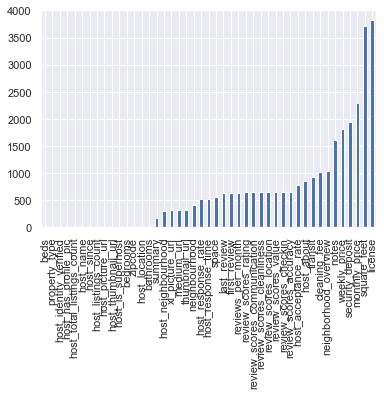

<Figure size 14400x10800 with 0 Axes>

In [7]:
#a look at columns with most missing values
missing = listing.isnull().sum()
missing = missing[missing > 0.75]
missing.sort_values(inplace=True)
missing.plot.bar()
plt.figure(figsize=(200,150))

# Formating 'price' column:
1. 'Price' is the target variable, it has no null values... 
2. But it has a dolar sign and therefore it is represented as string object. Inorder to proceed further the '$' sign will have to be removed and dtype of 'price' coumn will be changed to float.

In [8]:

listing['price'] = listing['price'].str.replace("[$, ]", "").astype("float")

In [9]:
listing['price'].head()

0     85.0
1    150.0
2    975.0
3    100.0
4    450.0
Name: price, dtype: float64

## Price trends
lets take a look how the price of renting varies===
1. in terms of distribution
2. how the locality affects the price?
3. how property_type effects the price?


<Figure size 2160x720 with 0 Axes>

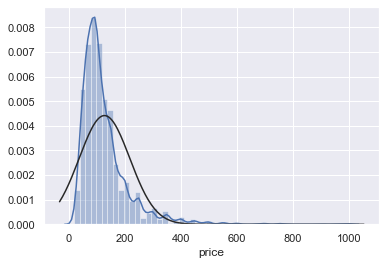

<Figure size 2160x720 with 0 Axes>

In [10]:
# Price distribution in listing data
sns.distplot(listing['price'], fit = norm)
plt.figure(figsize=(30,10))

In [11]:
listing['price'].describe()

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

## Q1. which neighbourhood has most  no. of listings?

Text(0, 0.5, 'Count Of Listings')

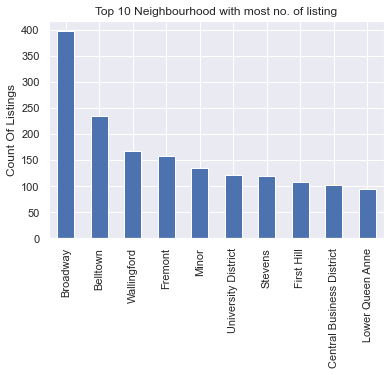

In [12]:
n=10
neighbourhood = listing.neighbourhood_cleansed.value_counts().head(n)
(neighbourhood).plot(kind="bar");
plt.title("Top 10 Neighbourhood with most no. of listing")
plt.ylabel('Count Of Listings')

## Q2 what are the most expensive neighbourhood in terms of price?

In [13]:
n = 10
price_neighbourhood = listing.groupby(['neighbourhood_cleansed']).mean()['price'].sort_values(ascending = False).head(n)


Text(0, 0.5, 'Price per room ($)')

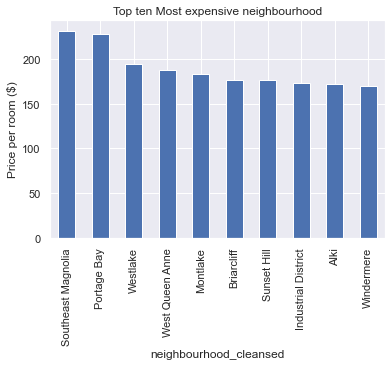

In [14]:
price_neighbourhood.plot(kind = 'bar')
plt.title('Top ten Most expensive neighbourhood')
plt.ylabel('Price per room ($)')

## Q3 How does the property type impact listing price on a neighborhood basis??

In [15]:
#get the count of different types of property in listing:
listing.property_type.value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

In [16]:

price_property_type = listing.groupby(['property_type']).mean()['price'].sort_values(ascending = False)


Text(0, 0.5, 'Price per night ($)')

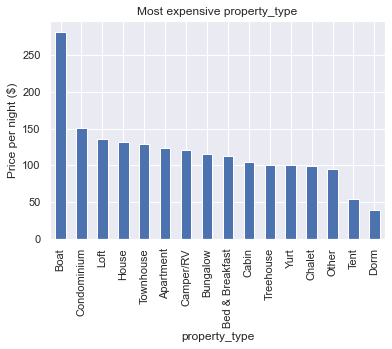

In [17]:
price_property_type.plot(kind = 'bar');
plt.title('Most expensive property_type')
plt.ylabel('Price per night ($)')

In [18]:
#how the price of rental (mean, std) varies with location- 
neighborhood_mean_df = pd.DataFrame(listing.groupby('neighbourhood_cleansed').mean()['price'].sort_values(ascending=False))
neighborhood_mean_df = neighborhood_mean_df.rename(columns = {'price': 'mean_price'})

neighborhood_std_df = pd.DataFrame(listing.groupby('neighbourhood_cleansed').std()['price'].sort_values(ascending=False))
neighborhood_std_df = neighborhood_std_df.rename(columns = {'price': 'std_price'})

neighborhood_df = neighborhood_mean_df.merge(neighborhood_std_df, on='neighbourhood_cleansed')

top_10 = neighborhood_df.index[:20].tolist() # the subset of neighborhoods we'll analyze for question three

neighborhood_df.head(5)

,mean_price,std_price
neighbourhood_cleansed,,
Southeast Magnolia,231.705882,225.117682
Portage Bay,227.857143,197.523458
Westlake,194.470588,173.057475
West Queen Anne,187.769231,170.476425
Montlake,182.789474,171.700508


In [19]:
# create a new dataframe showing the mean prices for the two most common property types- 'House', 'Apartment'
property_types = ['House', 'Apartment'] 

filtered_df = pd.DataFrame(listing.loc[listing['neighbourhood_cleansed'].isin(top_10) & listing['property_type'].isin(property_types)].groupby(['neighbourhood_cleansed', 'property_type']).mean()['price'].sort_values(ascending=False)).reset_index()


In [20]:
filtered_df.head(5)

,neighbourhood_cleansed,property_type,price
0,Portage Bay,House,340.285714
1,East Queen Anne,House,267.250000
2,West Queen Anne,House,247.393939
3,Southeast Magnolia,House,234.100000
4,Southeast Magnolia,Apartment,219.600000


/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 14400x108000 with 0 Axes>

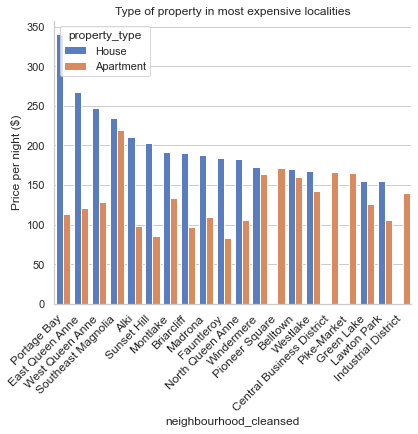

In [21]:
sns.set(style="whitegrid")

plt.figure(figsize=(200, 1500))
ax = sns.factorplot(x='neighbourhood_cleansed', y='price', hue='property_type', data=filtered_df, kind='bar', size=6, palette="muted",
                   legend_out = False )
ax.set_xticklabels(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium') 
plt.tight_layout()
plt.title('Type of property in most expensive localities')
plt.ylabel('Price per night ($)')
plt.show()

# Review dataset- get some insight

In [ ]:
# take a look at the review dataframe:
reviews.head()

In [ ]:
print('Number of unique listings in reviews dataset:{}'.format(len(reviews['listing_id'].unique())))

In [ ]:
print('Number of reviews {}'.format(reviews.shape[0]))

In [ ]:
# Number of missing data in comments field (review dataset)--- only 18 comments missing in reviews dataset
print(reviews['comments'].isna().sum())

# Calender dataset- get some insight

In [55]:
calender.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [56]:
#how many unique listings in calendar:
unique_listing_calender = calender['listing_id'].unique()
print('Number of unique listings in calendar dataset:{}'.format(len(unique_listing_calender)))

Number of unique listings in calendar dataset:3818


In [58]:
calender.info

<bound method DataFrame.info of          listing_id        date available   price
0            241032  2016-01-04         t  $85.00
1            241032  2016-01-05         t  $85.00
2            241032  2016-01-06         f     NaN
3            241032  2016-01-07         f     NaN
4            241032  2016-01-08         f     NaN
...             ...         ...       ...     ...
1393565    10208623  2016-12-29         f     NaN
1393566    10208623  2016-12-30         f     NaN
1393567    10208623  2016-12-31         f     NaN
1393568    10208623  2017-01-01         f     NaN
1393569    10208623  2017-01-02         f     NaN

[1393570 rows x 4 columns]>